In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.special import lambertw

In [119]:
df = pd.read_csv('data_pp.csv')
df.head()

,date,shizuoka_p,shizuoka_qual,shizuoka_homo,fuji_p,fuji_qual,fuji_homo
0,Jan-00,1015.9,8,1,630.8,5,1
1,Feb-00,1010.5,8,1,622.8,5,1
2,Mar-00,1010.8,8,1,626.9,8,1
3,Apr-00,1008.8,8,1,632.9,8,1
4,May-00,1009.5,8,1,640.2,8,1


In [120]:
print(df['shizuoka_qual'].unique())
print(df['fuji_qual'].unique())

[8 5]
[5 8 4 1]


In [121]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           240 non-null    object 
 1   shizuoka_p     240 non-null    float64
 2   shizuoka_qual  240 non-null    int64  
 3   shizuoka_homo  240 non-null    int64  
 4   fuji_p         239 non-null    float64
 5   fuji_qual      240 non-null    int64  
 6   fuji_homo      240 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 13.2+ KB
None


In [122]:
df[df['fuji_p'].isnull()]

,date,shizuoka_p,shizuoka_qual,shizuoka_homo,fuji_p,fuji_qual,fuji_homo
232,May-19,1011.4,8,1,NaN,1,1


In [123]:
g = 9.81
rho = 1.23
R = 287
gamma = 0.0065

## LambertのW関数を用いる
$x\ln(x)$は初等関数では求められないが、LambertのW関数を用いることで値が求まる  
>LambertのW関数は[こちら](https://oshiete.goo.ne.jp/qa/2726817.html)より求めた  
>SciPyのlambertw関数に関するドキュメントは[こちら](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lambertw.html)

In [124]:
print(np.real(lambertw(14*(rho*g)*np.exp(-np.log(1015.9*100)))))
print(np.exp(np.real(lambertw(14*(rho*g)*np.exp(-np.log(1015.9*100)))) + np.log(1015.9*100)))

0.0016600846297460544
101758.78806000463


In [171]:
df['sea_level_p'] = np.round(np.exp(np.real(lambertw(14*(rho*g)*np.exp(-np.log(df['shizuoka_p']*100)))) 
                                    + np.log(df['shizuoka_p']*100))/100, decimals=1)
df['fuji_z_est'] = np.round(df['sea_level_p']*100/(rho * g) * np.log(df['sea_level_p'] / df['fuji_p']))
#df['fuji_z_from_shizuoka'] = np.round(df['sea_level_p']*100/(rho * g) * np.log(df['shizuoka_p'] / df['fuji_p'])) + 14
#df['fuji_z_approx'] = np.round(df['shizuoka_p']*100/(rho * g) * np.log(df['shizuoka_p'] / df['fuji_p'])) + 14
df['fuji_z_change_T'] = np.round(df['sea_level_p']*100/(rho*R*gamma)*(1-(df['fuji_p']/df['sea_level_p'])**(R*gamma/g)))
df['diff'] = df['fuji_z_est'] - 3776

df['relative_accuracy'] = (df['fuji_z_from_0'] - 3776)/3776*100
df['sea_level_T'] = np.round(df['sea_level_p']*100/(rho*R))
df['ln(sea_level_p/fuji_p)'] = np.log(df['sea_level_p']/df['fuji_p'])
df['date_pp'] = np.linspace(0, 20, 20*12, endpoint=False)

In [168]:
col = ['date', 'shizuoka_p', 'fuji_p', 'sea_level_p', 'fuji_z_est', 'relative_accuracy', 
       'fuji_z_change_T', 'sea_level_T', 'ln(sea_level_p/fuji_p)', 'date_pp']

In [169]:
df[col].head(13)

,date,shizuoka_p,fuji_p,sea_level_p,fuji_z_est,relative_accuracy,fuji_z_change_T,sea_level_T,ln(sea_level_p/fuji_p),date_pp
0,Jan-00,1015.9,630.8,1017.6,4033.0,6.806144,3855.0,288.0,0.478213,0.000000
1,Feb-00,1010.5,622.8,1012.2,4074.0,7.891949,3892.0,287.0,0.485656,0.083333
2,Mar-00,1010.8,626.9,1012.5,4023.0,6.541314,3845.0,287.0,0.479391,0.166667
3,Apr-00,1008.8,632.9,1010.5,3918.0,3.760593,3749.0,286.0,0.467888,0.250000
4,May-00,1009.5,640.2,1011.2,3831.0,1.456568,3669.0,286.0,0.457112,0.333333
5,Jun-00,1007.1,643.2,1008.8,3763.0,-0.344280,3606.0,286.0,0.450061,0.416667
6,Jul-00,1006.6,647.0,1008.3,3707.0,-1.827331,3555.0,286.0,0.443675,0.500000
7,Aug-00,1009.7,650.0,1011.4,3706.0,-1.853814,3554.0,287.0,0.442118,0.583333
8,Sep-00,1009.7,646.6,1011.4,3750.0,-0.688559,3595.0,287.0,0.447363,0.666667
9,Oct-00,1014.6,644.8,1016.3,3832.0,1.483051,3671.0,288.0,0.454984,0.750000


In [130]:
df['fuji_z_est'].mean()

3880.878661087866

In [131]:
print(df['relative_accuracy'].max())
print(df['relative_accuracy'].min())

8.501059322033898
-2.5158898305084745


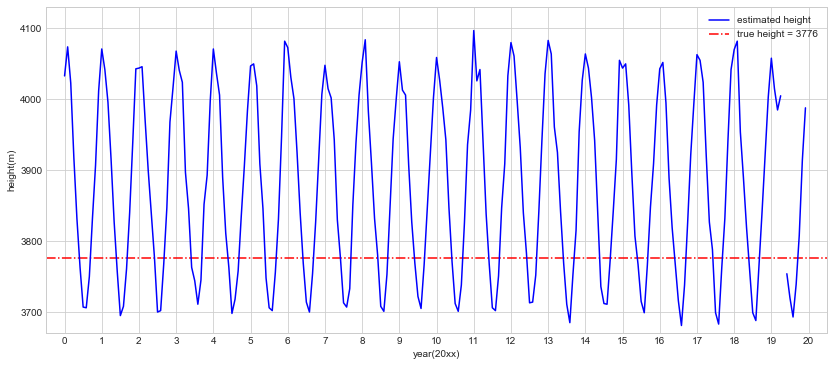

In [142]:
plt.figure(figsize = (14, 6))
plt.style.use('seaborn-whitegrid')
plt.plot(df['date_pp'], df['fuji_z_est'], 'b', label='estimated height')
#plt.plot(df['date'][:72], df['fuji_height'][:72])
plt.hlines([3776], -0.5, 20.5, "r", linestyles='dashdot', label='true height = 3776')
#plt.vlines(np.arange(0, 21)-1/24, 3670, 4180, 'k', linestyles = 'dotted')
plt.xticks(np.arange(0, 21))
plt.xlim([-.5, 20.5])
plt.ylim([3670, 4130])
plt.xlabel('year(20xx)')
plt.ylabel('height(m)')
plt.legend(loc='upper right')
plt.savefig('plot.jpg')
plt.show()

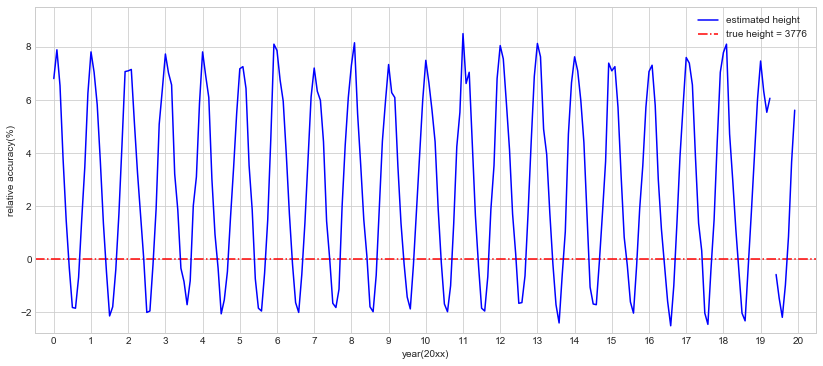

In [140]:
plt.figure(figsize = (14, 6))
plt.style.use('seaborn-whitegrid')
plt.plot(df['date_pp'], df['relative_accuracy'], 'b', label='estimated height')
#plt.plot(df['date'][:72], df['fuji_height'][:72])
plt.hlines([0], -0.5, 20.5, "r", linestyles='dashdot', label='true height = 3776')
#plt.vlines(np.arange(0, 21)-1/24, 3670, 4180, 'k', linestyles = 'dotted')
plt.xticks(np.arange(0, 21))
plt.xlim([-.5, 20.5])
plt.ylim([-2.8, 9.5])
plt.xlabel('year(20xx)')
plt.ylabel('relative accuracy(%)')
plt.legend(loc='upper right')
plt.savefig('acc.jpg')
plt.show()

In [173]:
df[['date', 'shizuoka_p', 'fuji_p', 'sea_level_p', 'ln(sea_level_p/fuji_p)', 'fuji_z_est', 'diff', 
   'relative_accuracy']].head(12).to_csv('table.csv', index=False)

In [150]:
print(df['sea_level_T'].min(), df['sea_level_T'].max())

285.0 289.0


In [163]:
df_temp = pd.read_csv('temp.csv')

In [164]:
df_temp['mean_temp'] = (df_temp['shizuoka_temp'] + df_temp['fuji_temp']) / 2

In [165]:
df_temp.head(12)

,date,shizuoka_temp,fuji_temp,mean_temp
0,Jan-00,8.3,-15.6,-3.65
1,Feb-00,5.9,-20.8,-7.45
2,Mar-00,9.6,-16.8,-3.60
3,Apr-00,14.9,-10.3,2.30
4,May-00,19.6,-3.7,7.95
5,Jun-00,21.8,2.1,11.95
6,Jul-00,26.2,4.1,15.15
7,Aug-00,27.2,6.7,16.95
8,Sep-00,24.4,2.9,13.65
9,Oct-00,19.3,-0.9,9.20


In [166]:
df_temp.head(12).to_csv('table_temp.csv', index=False)